<a href="https://colab.research.google.com/github/hey-tejas/TheSparksFoundation/blob/main/Exploratory_Data_Analysis_on_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **'Exploratory Data Analysis' on dataset 'Indian Premier League'**

# **Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Load the dataset**

In [ ]:
ipl_data = pd.read_csv("/content/matches.csv")

# **First few rows of the dataset**

In [ ]:
print("Sample of the IPL Dataset:")
print(ipl_data.head())
print("\n")


Sample of the IPL Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0       

# **Basic statistics of the dataset**

In [ ]:
print("Basic Statistics of the IPL Dataset:")
print(ipl_data.describe())
print("\n")


Basic Statistics of the IPL Dataset:
                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000




# **Visualize the most successful teams**

<ipython-input-5-70c78c2216bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=ipl_data, order=ipl_data['winner'].value_counts().index, palette='viridis')


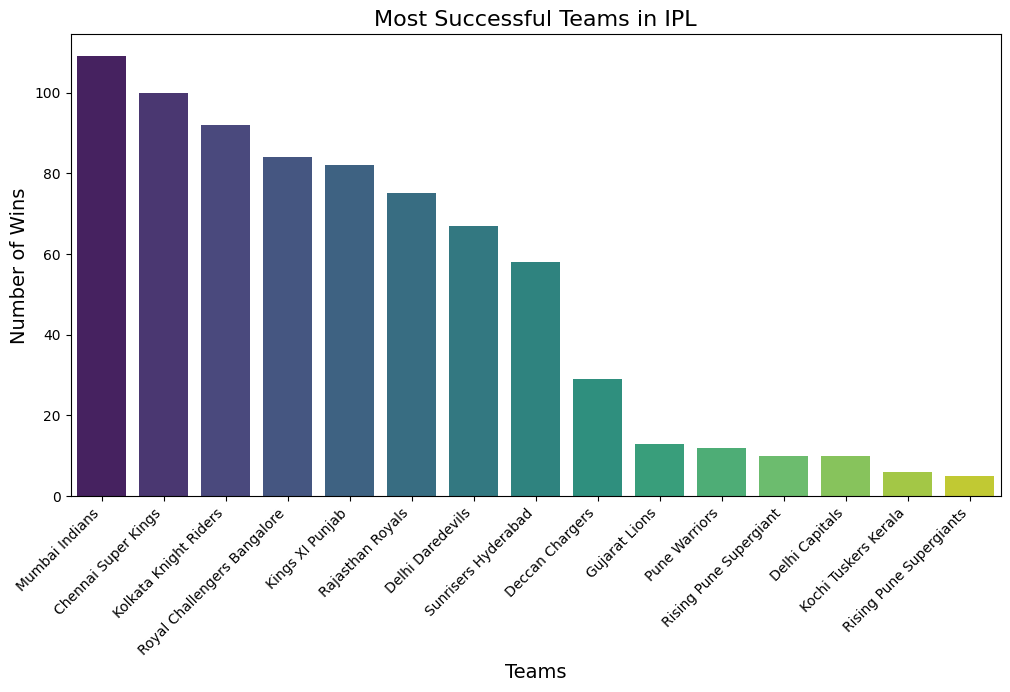

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=ipl_data, order=ipl_data['winner'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Most Successful Teams in IPL', fontsize=16)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.show()

# **Visualize the most successful players**

<ipython-input-6-ce2d5ea7da5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='player_of_match', data=ipl_data, order=ipl_data['player_of_match'].value_counts().index[:10], palette='plasma')


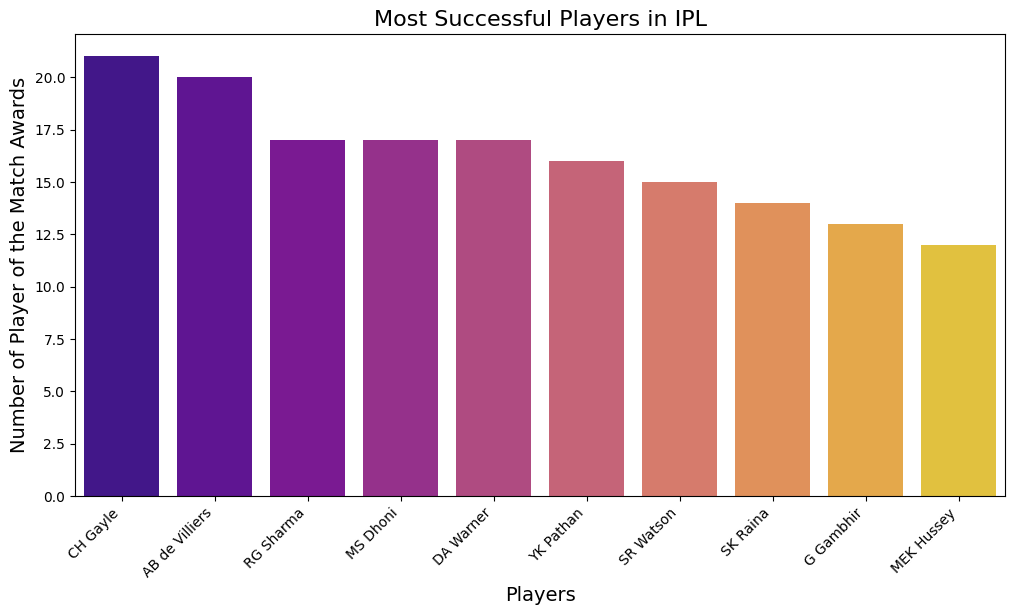

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='player_of_match', data=ipl_data, order=ipl_data['player_of_match'].value_counts().index[:10], palette='plasma')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Most Successful Players in IPL', fontsize=16)
plt.xlabel('Players', fontsize=14)
plt.ylabel('Number of Player of the Match Awards', fontsize=14)
plt.show()

# **Factors contributing to win or loss**

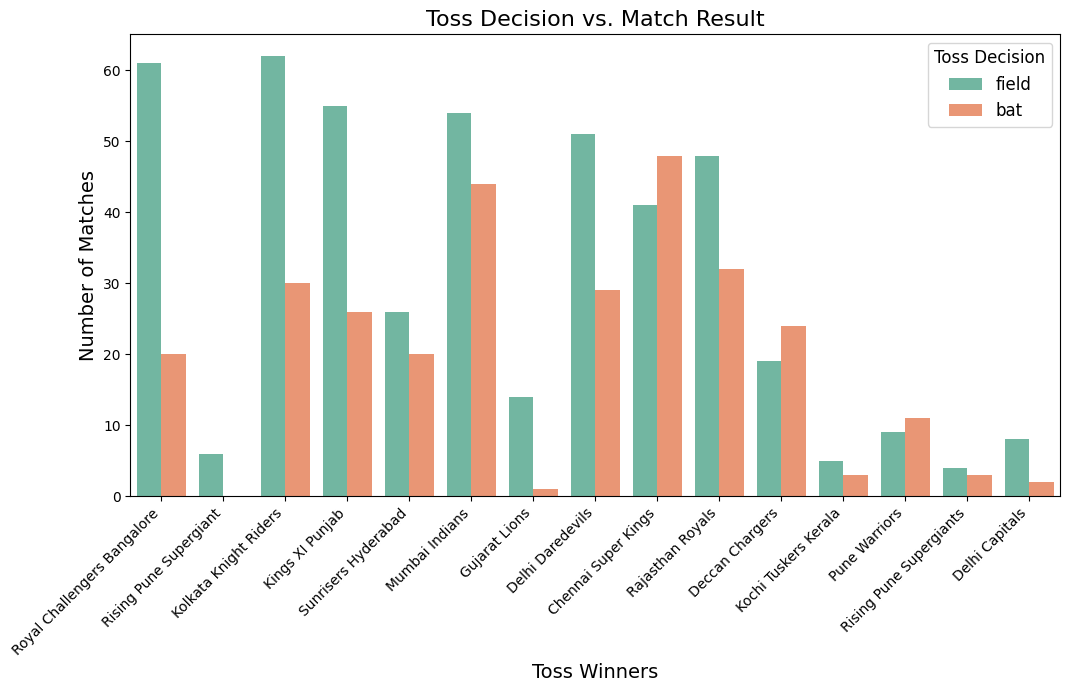

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_winner', hue='toss_decision', data=ipl_data, palette='Set2')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Toss Decision vs. Match Result', fontsize=16)
plt.xlabel('Toss Winners', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.legend(title='Toss Decision', fontsize=12, title_fontsize=12)
plt.show()

# **Teams/players to endorse**

In [ ]:
top_teams = ipl_data['winner'].value_counts().index[:3].tolist()
top_players = ipl_data['player_of_match'].value_counts().index[:3].tolist()

print('Top Teams to Endorse:', top_teams)
print('Top Players to Endorse:', top_players)

Top Teams to Endorse: ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders']
Top Players to Endorse: ['CH Gayle', 'AB de Villiers', 'RG Sharma']


# **Distribution of match results**

<ipython-input-9-8ae4e137423c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=ipl_data, palette='plasma')


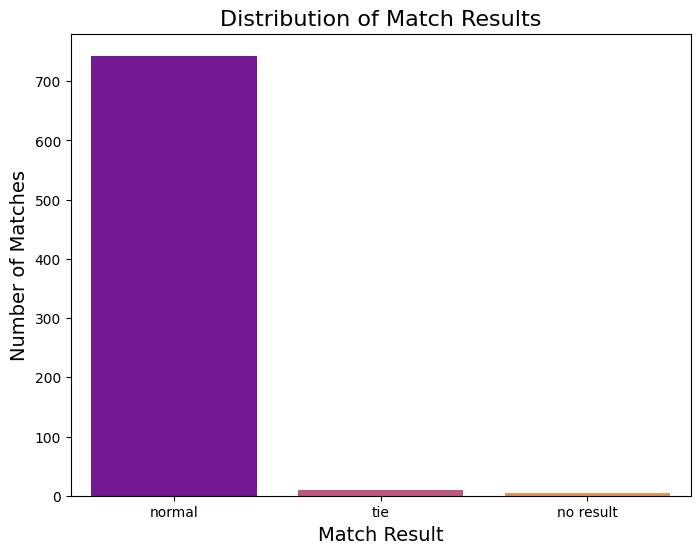

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=ipl_data, palette='plasma')
plt.title('Distribution of Match Results', fontsize=16)
plt.xlabel('Match Result', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.show()

# **Correlation heatmap among numerical features**

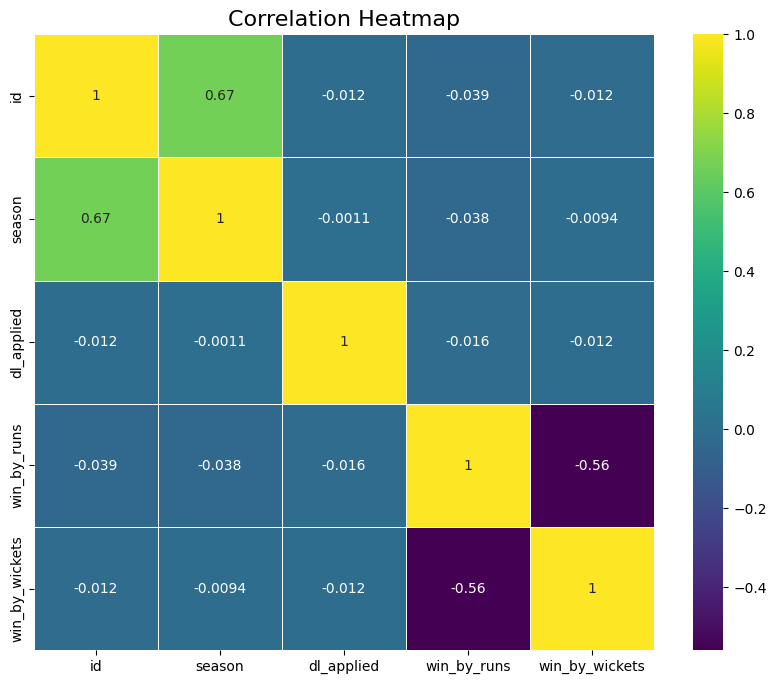

In [ ]:
numerical_features = ipl_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = ipl_data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# **Distribution** **of** **match** **outcomes**

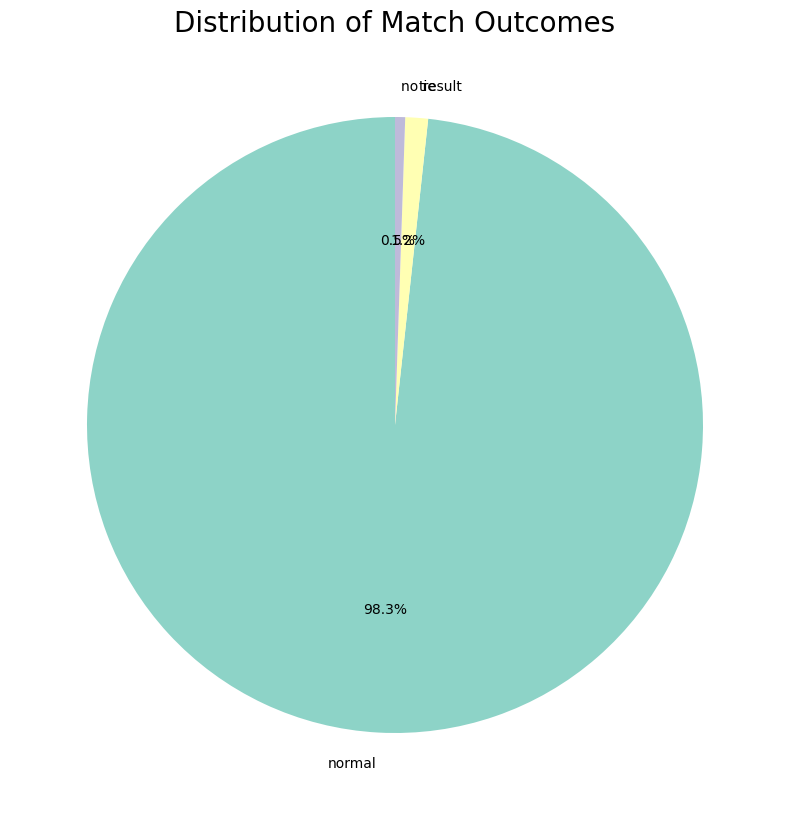

In [ ]:
plt.figure(figsize=(10, 10))
outcome_distribution = ipl_data['result'].value_counts()
labels = outcome_distribution.index
colors = sns.color_palette('Set3', n_colors=len(labels))

plt.pie(outcome_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Match Outcomes', fontsize=20)
plt.show()

